In [77]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [78]:
#Read in the data
expression_df = pd.read_csv('hg19.cage_peak_tpm_ann_decoded.osc.txt.gz.extract.tsv', sep='\t')

In [79]:
print("Number of Genes: " + str(len(expression_df)))
expression_df.head()

Number of Genes: 184827


,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,teratocarcinoma cell line:NCR-G1 CNhs11884.10798-110I6,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5
0,"chr10:100013403..100013414,-",NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.08,0.00,0.0,0.09
1,"chr10:100027943..100027958,-",uniprot:Q96JB6,0.0,0.0,21.37,0.0,0.79,0.0,0.00,0.73,...,1.14,0.1,0.0,0.09,0.0,5.72,7.81,0.64,0.0,27.58
2,"chr10:100076685..100076699,+",NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00
3,"chr10:100150910..100150935,-",NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.34,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00
4,"chr10:100150951..100150962,-",NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.45,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00


In [80]:
# Remove null values for gene ids
expression_df = expression_df[expression_df['uniprot_id'].notnull()]

In [81]:
print('Number of Genes: ' + str(len(expression_df)))
expression_df.head()

Number of Genes: 56011


,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,teratocarcinoma cell line:NCR-G1 CNhs11884.10798-110I6,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5
1,"chr10:100027943..100027958,-",uniprot:Q96JB6,0.00,0.00,21.37,0.00,0.79,0.00,0.00,0.73,...,1.14,0.10,0.00,0.09,0.00,5.72,7.81,0.64,0.00,27.58
6,"chr10:100174900..100174956,-",uniprot:Q8N2H3,0.00,0.00,4.47,1.77,26.87,25.75,0.00,0.00,...,5.19,4.08,2.14,6.34,1.50,9.42,8.38,2.13,9.65,14.91
7,"chr10:100174957..100174982,-",uniprot:Q8N2H3,0.00,0.00,1.49,0.00,3.16,5.15,0.00,0.00,...,1.27,0.71,0.80,0.37,0.00,1.23,1.87,0.32,3.86,2.07
14,"chr10:100206642..100206717,-","uniprot:Q92902,uniprot:Q658M9,uniprot:Q8WXE5",40.75,25.02,38.27,24.72,41.09,28.33,39.79,12.09,...,14.32,34.27,9.62,47.23,26.83,27.92,15.30,33.94,19.31,37.01
23,"chr10:100995440..100995474,-",uniprot:Q8WWQ2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.20,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [82]:
# Want to only include experiments with high read counts - higher sample size = more significant data
counts_df = pd.read_csv('hg19.cage_peak_counts_ann_decoded.osc.txt.gz.extract.tsv', sep='\t')

In [83]:
# Same filtering as expression data
counts_df = counts_df[counts_df['uniprot_id'].notnull()]
counts_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,teratocarcinoma cell line:NCR-G1 CNhs11884.10798-110I6,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5
1,"chr10:100027943..100027958,-",uniprot:Q96JB6,0,0,43,0,1,0,0,8,...,9,1,0,1,0,51,96,6,0,307
6,"chr10:100174900..100174956,-",uniprot:Q8N2H3,0,0,9,4,34,30,0,0,...,41,40,8,69,6,84,103,20,5,166
7,"chr10:100174957..100174982,-",uniprot:Q8N2H3,0,0,3,0,4,6,0,0,...,10,7,3,4,0,11,23,3,2,23
14,"chr10:100206642..100206717,-","uniprot:Q92902,uniprot:Q658M9,uniprot:Q8WXE5",526,176,77,56,52,33,355,132,...,113,336,36,514,107,249,188,318,10,412
23,"chr10:100995440..100995474,-",uniprot:Q8WWQ2,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0


In [84]:
#Count total counts for each experiment
expression_df['total_reads'] = counts_df.sum(axis=1)
expression_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5,total_reads
1,"chr10:100027943..100027958,-",uniprot:Q96JB6,0.00,0.00,21.37,0.00,0.79,0.00,0.00,0.73,...,0.10,0.00,0.09,0.00,5.72,7.81,0.64,0.00,27.58,5235
6,"chr10:100174900..100174956,-",uniprot:Q8N2H3,0.00,0.00,4.47,1.77,26.87,25.75,0.00,0.00,...,4.08,2.14,6.34,1.50,9.42,8.38,2.13,9.65,14.91,7066
7,"chr10:100174957..100174982,-",uniprot:Q8N2H3,0.00,0.00,1.49,0.00,3.16,5.15,0.00,0.00,...,0.71,0.80,0.37,0.00,1.23,1.87,0.32,3.86,2.07,1660
14,"chr10:100206642..100206717,-","uniprot:Q92902,uniprot:Q658M9,uniprot:Q8WXE5",40.75,25.02,38.27,24.72,41.09,28.33,39.79,12.09,...,34.27,9.62,47.23,26.83,27.92,15.30,33.94,19.31,37.01,36069
23,"chr10:100995440..100995474,-",uniprot:Q8WWQ2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.20,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,422


In [85]:
# filter expression data for experiments with read counts of at least 10000
expression_df = expression_df[expression_df.total_reads >= 10000]
print('Number of genes: ' + str(len(expression_df)))

Number of genes: 9386


In [86]:
expression_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5,total_reads
14,"chr10:100206642..100206717,-","uniprot:Q92902,uniprot:Q658M9,uniprot:Q8WXE5",40.75,25.02,38.27,24.72,41.09,28.33,39.79,12.09,...,34.27,9.62,47.23,26.83,27.92,15.30,33.94,19.31,37.01,36069
31,"chr10:101190374..101190429,-",uniprot:B7Z1I2,52.45,46.92,30.32,13.69,33.98,29.19,33.85,13.83,...,33.76,59.59,56.70,81.98,18.28,44.04,76.63,13.52,37.82,62410
49,"chr10:101419187..101419313,+",uniprot:Q9NQZ7,3.56,4.41,12.92,0.00,7.90,10.30,2.80,9.89,...,9.59,5.34,11.12,4.01,4.37,10.01,7.47,25.10,9.52,16614
54,"chr10:101491828..101491900,-",uniprot:Q7KZN9,28.66,22.18,10.44,16.78,22.13,15.45,15.69,8.42,...,9.79,17.37,17.83,21.31,12.22,9.44,27.75,5.79,18.95,22709
55,"chr10:101491968..101492076,+",uniprot:Q9NTM9,50.59,46.63,16.40,45.91,22.13,22.32,25.78,12.00,...,20.09,23.78,38.32,45.13,17.38,9.69,20.92,17.38,19.58,33467


In [87]:
# remove any genes that have no expression for any cell line
expression_df.replace(0,np.nan, inplace=True)
expression_df = expression_df.dropna(axis=0,how='any')
expression_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5,total_reads
31,"chr10:101190374..101190429,-",uniprot:B7Z1I2,52.45,46.92,30.32,13.69,33.98,29.19,33.85,13.83,...,33.76,59.59,56.70,81.98,18.28,44.04,76.63,13.52,37.82,62410
54,"chr10:101491828..101491900,-",uniprot:Q7KZN9,28.66,22.18,10.44,16.78,22.13,15.45,15.69,8.42,...,9.79,17.37,17.83,21.31,12.22,9.44,27.75,5.79,18.95,22709
55,"chr10:101491968..101492076,+",uniprot:Q9NTM9,50.59,46.63,16.40,45.91,22.13,22.32,25.78,12.00,...,20.09,23.78,38.32,45.13,17.38,9.69,20.92,17.38,19.58,33467
93,"chr10:101945771..101945795,-","uniprot:B0QZ43,uniprot:O75477",5.73,6.54,12.92,3.09,11.06,7.73,5.94,9.34,...,6.32,12.29,11.49,13.04,12.78,4.80,19.74,11.58,8.98,16121
96,"chr10:101989315..101989368,-",uniprot:O15111,25.41,37.96,22.86,26.05,7.11,8.58,25.89,25.00,...,18.36,19.77,30.78,11.53,12.78,25.56,19.64,21.24,16.44,31139


In [88]:
print('Number of genes: ' + str(len(expression_df)))

Number of genes: 5426


In [89]:
expression_df =  expression_df.reset_index(drop=True)
expression_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5,total_reads
0,"chr10:101190374..101190429,-",uniprot:B7Z1I2,52.45,46.92,30.32,13.69,33.98,29.19,33.85,13.83,...,33.76,59.59,56.70,81.98,18.28,44.04,76.63,13.52,37.82,62410
1,"chr10:101491828..101491900,-",uniprot:Q7KZN9,28.66,22.18,10.44,16.78,22.13,15.45,15.69,8.42,...,9.79,17.37,17.83,21.31,12.22,9.44,27.75,5.79,18.95,22709
2,"chr10:101491968..101492076,+",uniprot:Q9NTM9,50.59,46.63,16.40,45.91,22.13,22.32,25.78,12.00,...,20.09,23.78,38.32,45.13,17.38,9.69,20.92,17.38,19.58,33467
3,"chr10:101945771..101945795,-","uniprot:B0QZ43,uniprot:O75477",5.73,6.54,12.92,3.09,11.06,7.73,5.94,9.34,...,6.32,12.29,11.49,13.04,12.78,4.80,19.74,11.58,8.98,16121
4,"chr10:101989315..101989368,-",uniprot:O15111,25.41,37.96,22.86,26.05,7.11,8.58,25.89,25.00,...,18.36,19.77,30.78,11.53,12.78,25.56,19.64,21.24,16.44,31139


In [90]:
expression_df = expression_df.drop('total_reads', axis=1)

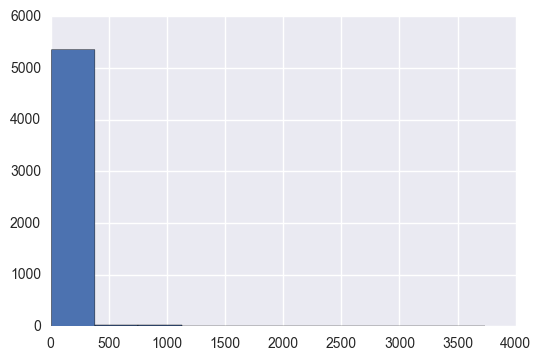

In [91]:

plt.hist(expression_df.mean(axis=1))
plt.show()

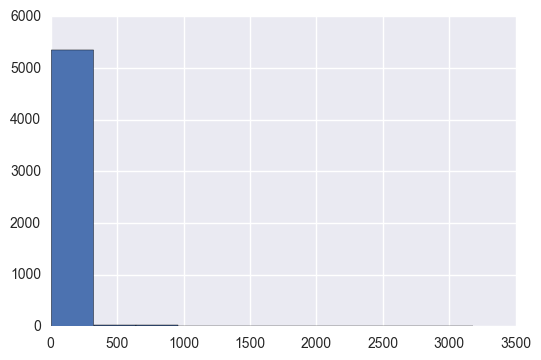

In [92]:
plt.hist(expression_df.median(axis=1))
plt.show()

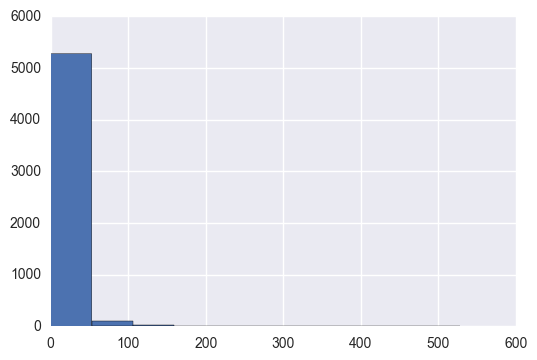

In [93]:
plt.hist(expression_df.min(axis=1))
plt.show()

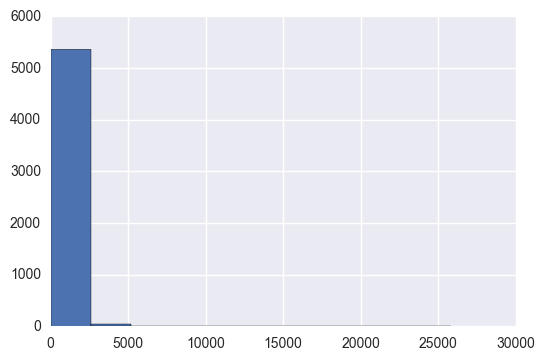

In [94]:
plt.hist(expression_df.max(axis=1))
plt.show()

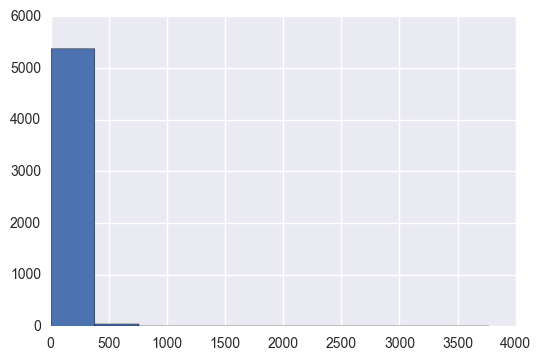

In [95]:
plt.hist(expression_df.std(axis=1))
plt.show()

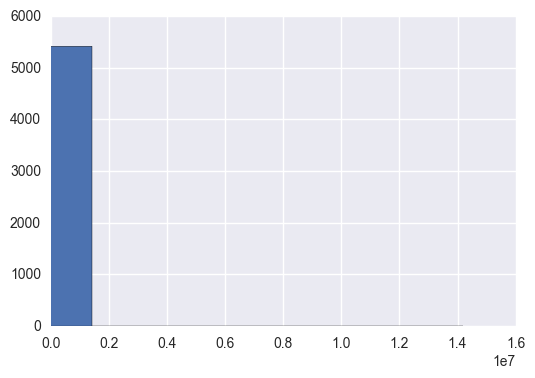

In [96]:
plt.hist(expression_df.var(axis=1))
plt.show()

In [97]:
# Data is still not very clean
# try computing log transformation of expression values to see if it can be better to work with
num_df = expression_df._get_numeric_data()

In [98]:
num_df[num_df < 2] = 2
num_df.head()

,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6","Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep3 (A3 T0) CNhs12952.12858-137D5",Wilms' tumor cell line:G-401 CNhs11892.10809-111A8,...,teratocarcinoma cell line:NCR-G1 CNhs11884.10798-110I6,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5
0,52.45,46.92,30.32,13.69,33.98,29.19,33.85,13.83,17.57,24.57,...,55.24,33.76,59.59,56.70,81.98,18.28,44.04,76.63,13.52,37.82
1,28.66,22.18,10.44,16.78,22.13,15.45,15.69,8.42,11.39,15.38,...,17.36,9.79,17.37,17.83,21.31,12.22,9.44,27.75,5.79,18.95
2,50.59,46.63,16.40,45.91,22.13,22.32,25.78,12.00,12.29,21.90,...,15.46,20.09,23.78,38.32,45.13,17.38,9.69,20.92,17.38,19.58
3,5.73,6.54,12.92,3.09,11.06,7.73,5.94,9.34,9.32,7.69,...,11.28,6.32,12.29,11.49,13.04,12.78,4.80,19.74,11.58,8.98
4,25.41,37.96,22.86,26.05,7.11,8.58,25.89,25.00,27.06,17.63,...,25.34,18.36,19.77,30.78,11.53,12.78,25.56,19.64,21.24,16.44


In [99]:
num_df = num_df.apply(lambda x: np.log2(x) - np.log2(x.mean()), axis=1)

In [100]:
num_df.head()

,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6","Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep3 (A3 T0) CNhs12952.12858-137D5",Wilms' tumor cell line:G-401 CNhs11892.10809-111A8,...,teratocarcinoma cell line:NCR-G1 CNhs11884.10798-110I6,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5
0,0.374489,0.213750,-0.416184,-1.563331,-0.251768,-0.470979,-0.257298,-1.548652,-1.203339,-0.719556,...,0.449260,-0.261139,0.558617,0.486895,1.018819,-1.146187,0.122361,0.921456,-1.581358,-0.097304
1,0.929673,0.559894,-0.527244,0.157377,0.556638,0.038241,0.060480,-0.837474,-0.401598,0.031690,...,0.206401,-0.619985,0.207232,0.244941,0.502165,-0.300121,-0.672507,0.883122,-1.377730,0.332832
2,1.097073,0.979479,-0.528084,0.957029,-0.095776,-0.083442,0.124473,-0.978745,-0.944295,-0.110849,...,-0.613239,-0.235302,0.007969,0.696318,0.932307,-0.444351,-1.287211,-0.176897,-0.444351,-0.272399
3,-0.941555,-0.750799,0.231444,-1.832483,0.007190,-0.509622,-0.889627,-0.236667,-0.239760,-0.517106,...,0.035605,-0.800165,0.159323,0.062217,0.244782,0.215726,-1.197056,0.842960,0.073473,-0.293375
4,0.273768,0.852851,0.121197,0.309655,-1.563707,-1.292579,0.300766,0.250299,0.364533,-0.253596,...,0.269788,-0.195063,-0.088316,0.550364,-0.866236,-0.717741,0.282259,-0.097834,0.015155,-0.354419


In [101]:
# Remove genes with low variance (stdev under 0.3)
num_df['st_dev'] = num_df.std(axis=1)
num_df.head()

,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6","Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep3 (A3 T0) CNhs12952.12858-137D5",Wilms' tumor cell line:G-401 CNhs11892.10809-111A8,...,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5,st_dev
0,0.374489,0.213750,-0.416184,-1.563331,-0.251768,-0.470979,-0.257298,-1.548652,-1.203339,-0.719556,...,-0.261139,0.558617,0.486895,1.018819,-1.146187,0.122361,0.921456,-1.581358,-0.097304,0.984013
1,0.929673,0.559894,-0.527244,0.157377,0.556638,0.038241,0.060480,-0.837474,-0.401598,0.031690,...,-0.619985,0.207232,0.244941,0.502165,-0.300121,-0.672507,0.883122,-1.377730,0.332832,0.604895
2,1.097073,0.979479,-0.528084,0.957029,-0.095776,-0.083442,0.124473,-0.978745,-0.944295,-0.110849,...,-0.235302,0.007969,0.696318,0.932307,-0.444351,-1.287211,-0.176897,-0.444351,-0.272399,0.900374
3,-0.941555,-0.750799,0.231444,-1.832483,0.007190,-0.509622,-0.889627,-0.236667,-0.239760,-0.517106,...,-0.800165,0.159323,0.062217,0.244782,0.215726,-1.197056,0.842960,0.073473,-0.293375,0.791506
4,0.273768,0.852851,0.121197,0.309655,-1.563707,-1.292579,0.300766,0.250299,0.364533,-0.253596,...,-0.195063,-0.088316,0.550364,-0.866236,-0.717741,0.282259,-0.097834,0.015155,-0.354419,0.573207


In [102]:
clean_num_df = num_df[num_df['st_dev'] > 0.3]
clean_num_df.head()

,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6","Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep3 (A3 T0) CNhs12952.12858-137D5",Wilms' tumor cell line:G-401 CNhs11892.10809-111A8,...,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5,st_dev
0,0.374489,0.213750,-0.416184,-1.563331,-0.251768,-0.470979,-0.257298,-1.548652,-1.203339,-0.719556,...,-0.261139,0.558617,0.486895,1.018819,-1.146187,0.122361,0.921456,-1.581358,-0.097304,0.984013
1,0.929673,0.559894,-0.527244,0.157377,0.556638,0.038241,0.060480,-0.837474,-0.401598,0.031690,...,-0.619985,0.207232,0.244941,0.502165,-0.300121,-0.672507,0.883122,-1.377730,0.332832,0.604895
2,1.097073,0.979479,-0.528084,0.957029,-0.095776,-0.083442,0.124473,-0.978745,-0.944295,-0.110849,...,-0.235302,0.007969,0.696318,0.932307,-0.444351,-1.287211,-0.176897,-0.444351,-0.272399,0.900374
3,-0.941555,-0.750799,0.231444,-1.832483,0.007190,-0.509622,-0.889627,-0.236667,-0.239760,-0.517106,...,-0.800165,0.159323,0.062217,0.244782,0.215726,-1.197056,0.842960,0.073473,-0.293375,0.791506
4,0.273768,0.852851,0.121197,0.309655,-1.563707,-1.292579,0.300766,0.250299,0.364533,-0.253596,...,-0.195063,-0.088316,0.550364,-0.866236,-0.717741,0.282259,-0.097834,0.015155,-0.354419,0.573207


In [103]:
print(str(len(clean_num_df)))

5426


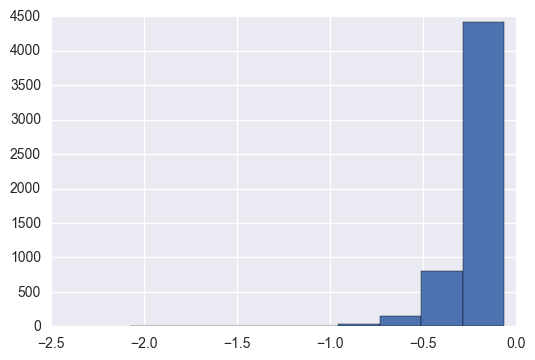

In [104]:
# Data looks cleaner now
clean_num_df = clean_num_df.drop('st_dev', axis=1)
plt.hist(clean_num_df.mean(axis=1))
plt.show()

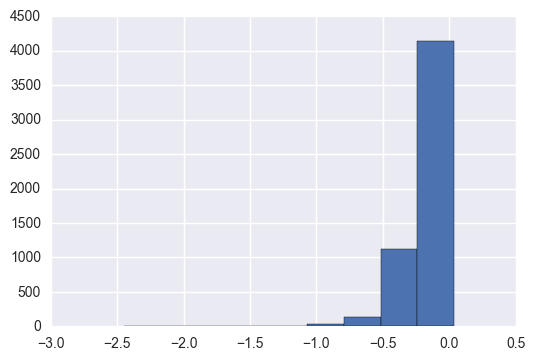

In [105]:
plt.hist(clean_num_df.median(axis=1))
plt.show()

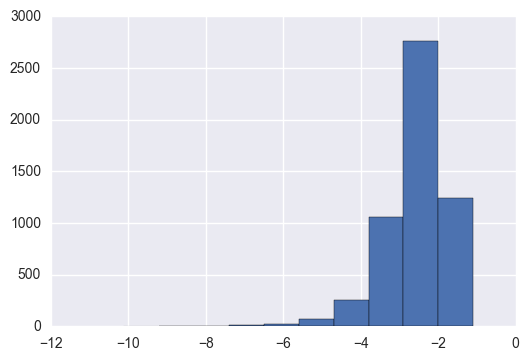

In [106]:
plt.hist(clean_num_df.min(axis=1))
plt.show()

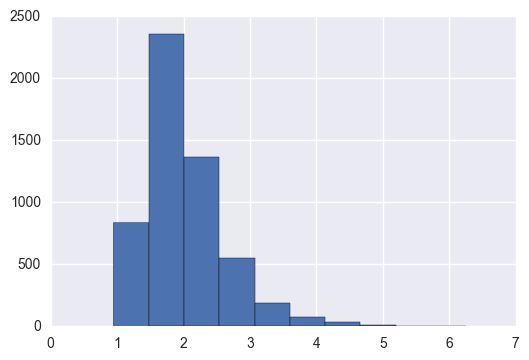

In [107]:
plt.hist(clean_num_df.max(axis=1))
plt.show()

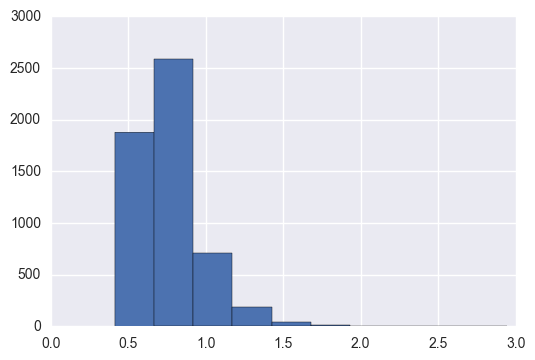

In [108]:
plt.hist(clean_num_df.std(axis=1))
plt.show()

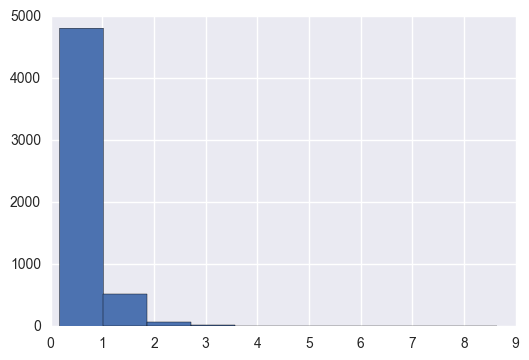

In [109]:
plt.hist(clean_num_df.var(axis=1))
plt.show()

In [111]:
gene_id_df = expression_df.iloc[:,0:2]
gene_id_df.head()

,00Annotation,uniprot_id
0,"chr10:101190374..101190429,-",uniprot:B7Z1I2
1,"chr10:101491828..101491900,-",uniprot:Q7KZN9
2,"chr10:101491968..101492076,+",uniprot:Q9NTM9
3,"chr10:101945771..101945795,-","uniprot:B0QZ43,uniprot:O75477"
4,"chr10:101989315..101989368,-",uniprot:O15111


In [112]:
final_expression_df = pd.concat([gene_id_df, clean_num_df], axis=1)

In [113]:
final_expression_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,teratocarcinoma cell line:NCR-G1 CNhs11884.10798-110I6,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5
0,"chr10:101190374..101190429,-",uniprot:B7Z1I2,0.374489,0.213750,-0.416184,-1.563331,-0.251768,-0.470979,-0.257298,-1.548652,...,0.449260,-0.261139,0.558617,0.486895,1.018819,-1.146187,0.122361,0.921456,-1.581358,-0.097304
1,"chr10:101491828..101491900,-",uniprot:Q7KZN9,0.929673,0.559894,-0.527244,0.157377,0.556638,0.038241,0.060480,-0.837474,...,0.206401,-0.619985,0.207232,0.244941,0.502165,-0.300121,-0.672507,0.883122,-1.377730,0.332832
2,"chr10:101491968..101492076,+",uniprot:Q9NTM9,1.097073,0.979479,-0.528084,0.957029,-0.095776,-0.083442,0.124473,-0.978745,...,-0.613239,-0.235302,0.007969,0.696318,0.932307,-0.444351,-1.287211,-0.176897,-0.444351,-0.272399
3,"chr10:101945771..101945795,-","uniprot:B0QZ43,uniprot:O75477",-0.941555,-0.750799,0.231444,-1.832483,0.007190,-0.509622,-0.889627,-0.236667,...,0.035605,-0.800165,0.159323,0.062217,0.244782,0.215726,-1.197056,0.842960,0.073473,-0.293375
4,"chr10:101989315..101989368,-",uniprot:O15111,0.273768,0.852851,0.121197,0.309655,-1.563707,-1.292579,0.300766,0.250299,...,0.269788,-0.195063,-0.088316,0.550364,-0.866236,-0.717741,0.282259,-0.097834,0.015155,-0.354419


In [115]:
columns = list(final_expression_df.iloc[:,2:].columns)    

In [133]:
clean_columns=[]
for c in columns:
    c = c.split()[0:2]
    clean_columns.append(c[0]+ ' ' + c[1])

In [135]:
clean_column_dict = {}
for c in clean_columns:
    clean_column_dict[c] = clean_columns.count(c)
    

In [172]:
final_columns = []
for c in clean_columns:
    for i in range(1,clean_column_dict[c]+1):
        final_columns.append(c + ' ' + str(i))        

In [174]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [175]:
final_clean_columns = f7(final_columns)

In [177]:
columns_dict = {}
for c, f in zip(columns, final_clean_columns):
    columns_dict[c] = f

In [190]:
final_expression_df.rename(columns=dict(zip(columns, final_clean_columns)), inplace=True)

In [191]:
final_expression_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma 1,Burkitt's lymphoma 2,Ewing's sarcoma 1,Hodgkin's lymphoma 1,MCF7 breast 1,MCF7 breast 2,NK T 1,Saos-2 osteosarcoma 1,...,teratocarcinoma cell 3,testicular germ 1,testicular germ 2,testicular germ 3,testicular germ 4,thyroid carcinoma 1,transitional-cell carcinoma 1,transitional-cell carcinoma 2,tridermal teratoma 1,tubular adenocarcinoma 1
0,"chr10:101190374..101190429,-",uniprot:B7Z1I2,0.374489,0.213750,-0.416184,-1.563331,-0.251768,-0.470979,-0.257298,-1.548652,...,0.449260,-0.261139,0.558617,0.486895,1.018819,-1.146187,0.122361,0.921456,-1.581358,-0.097304
1,"chr10:101491828..101491900,-",uniprot:Q7KZN9,0.929673,0.559894,-0.527244,0.157377,0.556638,0.038241,0.060480,-0.837474,...,0.206401,-0.619985,0.207232,0.244941,0.502165,-0.300121,-0.672507,0.883122,-1.377730,0.332832
2,"chr10:101491968..101492076,+",uniprot:Q9NTM9,1.097073,0.979479,-0.528084,0.957029,-0.095776,-0.083442,0.124473,-0.978745,...,-0.613239,-0.235302,0.007969,0.696318,0.932307,-0.444351,-1.287211,-0.176897,-0.444351,-0.272399
3,"chr10:101945771..101945795,-","uniprot:B0QZ43,uniprot:O75477",-0.941555,-0.750799,0.231444,-1.832483,0.007190,-0.509622,-0.889627,-0.236667,...,0.035605,-0.800165,0.159323,0.062217,0.244782,0.215726,-1.197056,0.842960,0.073473,-0.293375
4,"chr10:101989315..101989368,-",uniprot:O15111,0.273768,0.852851,0.121197,0.309655,-1.563707,-1.292579,0.300766,0.250299,...,0.269788,-0.195063,-0.088316,0.550364,-0.866236,-0.717741,0.282259,-0.097834,0.015155,-0.354419


In [192]:
import plotly.plotly as py
from plotly.graph_objs import *

In [195]:
final_expression_df['breadth'] =  (final_expression_df[final_expression_df.columns[2:].values.tolist()].astype('float')

>0).sum(axis=1)

final_expression_df['avg'] = final_expression_df[final_expression_df.columns[2:].values.tolist()].astype('float').mean(axis=1)

trace1 = Histogram(
        name="expression breadth",
        x = final_expression_df['breadth'],
        marker=Marker(
        line=Line(
            color='grey',
            width=0
        ),
        ),
)

trace2 = Histogram(
        name="average expression",
        x = final_expression_df['avg'],
        marker=Marker(
        line=Line(
            color='grey',
            width=0
        ),
        ),
    xaxis='x2',
    yaxis='y2'
    )


layout = Layout(
    title="Exploring the distributions",
    xaxis=XAxis(
        title='breadth',
         domain=[0, 0.45]
    ),
    xaxis2=XAxis(
        title='average expression',
        domain=[0.55, 1],
    ), 
    yaxis2=YAxis(
        anchor='x2'
    )
)

fig = Figure(data=Data([trace1, trace2]), layout=layout)
py.iplot(fig)

In [198]:
x = final_expression_df['breadth']
y = final_expression_df['avg']
coefficients = np.polyfit(x, y, 6)
polynomial = np.poly1d(coefficients)
r_x = np.arange(0, 72, 0.5)
r_y = polynomial(r_x)

trace1 = Scatter(
    x=x,
    y=y,
    mode='markers',
    name="expression levels",
    text=final_expression_df['uniprot_id'],
    marker=Marker(
        size=5,
        line=Line(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5),
        opacity=0.2))

trace2 = Scatter(
    mode='lines+markers',
    x=r_x, 
    y=r_y,
    marker=Marker(
        size=5,
        line=Line(
            color='purple',
            width=0.5),
        opacity=0.5),
    name="breadth regression")

layout = Layout(
    title="Breadth of expression vs average expression level",
    xaxis=XAxis(
        title='breadth',
    ),
    yaxis=YAxis(
        title='average expression',
    ),
)
fig = Figure(data=Data([trace1, trace2]), layout=layout)
py.iplot(fig)


In [199]:
final_expression_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma 1,Burkitt's lymphoma 2,Ewing's sarcoma 1,Hodgkin's lymphoma 1,MCF7 breast 1,MCF7 breast 2,NK T 1,Saos-2 osteosarcoma 1,...,testicular germ 2,testicular germ 3,testicular germ 4,thyroid carcinoma 1,transitional-cell carcinoma 1,transitional-cell carcinoma 2,tridermal teratoma 1,tubular adenocarcinoma 1,breadth,avg
0,"chr10:101190374..101190429,-",uniprot:B7Z1I2,0.374489,0.213750,-0.416184,-1.563331,-0.251768,-0.470979,-0.257298,-1.548652,...,0.558617,0.486895,1.018819,-1.146187,0.122361,0.921456,-1.581358,-0.097304,98,0.085033
1,"chr10:101491828..101491900,-",uniprot:Q7KZN9,0.929673,0.559894,-0.527244,0.157377,0.556638,0.038241,0.060480,-0.837474,...,0.207232,0.244941,0.502165,-0.300121,-0.672507,0.883122,-1.377730,0.332832,118,0.369618
2,"chr10:101491968..101492076,+",uniprot:Q9NTM9,1.097073,0.979479,-0.528084,0.957029,-0.095776,-0.083442,0.124473,-0.978745,...,0.007969,0.696318,0.932307,-0.444351,-1.287211,-0.176897,-0.444351,-0.272399,93,0.106958
3,"chr10:101945771..101945795,-","uniprot:B0QZ43,uniprot:O75477",-0.941555,-0.750799,0.231444,-1.832483,0.007190,-0.509622,-0.889627,-0.236667,...,0.159323,0.062217,0.244782,0.215726,-1.197056,0.842960,0.073473,-0.293375,115,0.282779
4,"chr10:101989315..101989368,-",uniprot:O15111,0.273768,0.852851,0.121197,0.309655,-1.563707,-1.292579,0.300766,0.250299,...,-0.088316,0.550364,-0.866236,-0.717741,0.282259,-0.097834,0.015155,-0.354419,114,0.375175


In [203]:
from scipy.spatial.distance import pdist, squareform

cols = [col for col in final_expression_df.columns if col not in ['breadth', 'uniprot_id', 'avg', '00Annotation']]
data_dist = pdist(final_expression_df[cols].as_matrix().transpose())

data = Data([
    Heatmap(
        z=squareform(data_dist), colorscale='YIGnBu',
        x=cols,
        y=cols,     # y-axis labels
    )
])

layout = Layout(
    title='Transcription profiling of cancer/tumor',
    autosize=True,
    #margin=Margin(
       # l=200,
       # b=200,
       # pad=4
    #,
    xaxis=XAxis(
        showgrid=False, # remove grid
        autotick=False, # custom ticks
        dtick=1,        # show 1 tick per day
    ),
    yaxis=YAxis(
        showgrid=False,   # remove grid
        autotick=False,   # custom ticks
        dtick=1           # show 1 tick per day
    ),
)
fig = Figure(data=data, layout=layout)
py.iplot(fig, width=900, height=900)

In [205]:
from scipy import stats

In [206]:
stats.ttest_1samp(final_expression_df.avg, final_expression_df.avg.mean())

Ttest_1sampResult(statistic=4.925577446860734e-14, pvalue=0.9999999999999607)

In [209]:
stats.ttest_1samp(final_expression_df.breadth, final_expression_df.breadth.mean())

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [ ]:
final_expression_df.loc[]